In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook

# Our team

Babicheva Alexandra, BPI-162-1 - I tried different models and approaches <br>
Maxim Chernyshenko BPI-162-1- I did feature engeneering on text data

# Contents
- Data Loading
- Basic Preprocessing
- Descriptive Data Analysis
- Split into features and targets, train/test split
- Categorial Features Preprocessing
- Baseline prediction
- Best Model
- Model Interpretation
- Failed Approaches
- Failed approaches to feature preprocessing
- Prediction without machine learning

# Data Loading

In [2]:
df = pd.read_csv('train.tsv', delimiter='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351281 entries, 0 to 351280
Data columns (total 20 columns):
Unnamed: 0            351281 non-null int64
category_id           351281 non-null int64
city                  351281 non-null object
date_created          351281 non-null object
delivery_available    351281 non-null bool
desc_text             351281 non-null object
img_num               351281 non-null int64
lat                   351281 non-null float64
long                  351281 non-null float64
name_text             351281 non-null object
owner_id              351281 non-null object
payment_available     351281 non-null bool
price                 351281 non-null float64
product_id            351281 non-null object
product_type          351281 non-null int64
properties            351281 non-null object
region                351281 non-null object
sold_mode             351281 non-null int64
subcategory_id        351281 non-null int64
sold_fast             351281 non-null int

# Basic Preprocessing
### Converting types, dropping id columns

In [4]:
df['date_created']=pd.to_datetime(df['date_created'],format='%Y-%m-%d')

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df[['delivery_available', 'payment_available']]=df[['delivery_available', 'payment_available']].astype(int)

In [7]:
df=df.drop('owner_id',axis=1)
df=df.drop('product_id',axis=1)

### Compute statistics to check if there are outliers in data

In [170]:
df.describe()

,category_id,delivery_available,img_num,lat,long,payment_available,price,product_type,sold_mode,subcategory_id,sold_fast,good_cond,best_cond,work_cond,bargain
count,351281.000000,351281.000000,351281.000000,351281.000000,351281.000000,351281.000000,3.512810e+05,351281.000000,351281.000000,351281.000000,351281.000000,351281.000000,351281.000000,351281.000000,351281.000000
mean,10.118079,0.328893,2.674420,54.494973,55.174965,0.595779,1.198376e+05,1.080366,1.010732,1018.764619,0.230812,0.000558,0.000270,0.024769,0.103421
std,8.421389,0.469812,1.614119,4.558449,26.451016,0.490741,2.617846e+07,0.561307,0.103039,840.894302,0.421353,0.023615,0.016443,0.155422,0.304509
min,1.000000,0.000000,1.000000,39.735200,19.888400,0.000000,0.000000e+00,1.000000,1.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,53.198600,37.665400,0.000000,5.000000e+02,1.000000,1.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,3.000000,55.675000,43.790100,1.000000,1.350000e+03,1.000000,1.000000,912.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,1.000000,4.000000,56.692700,61.421000,1.000000,4.700000e+03,1.000000,1.000000,1306.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,20.000000,69.505000,158.822600,1.000000,1.000000e+10,8.000000,2.000000,10001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Descriptive data analysis

In [9]:
def unique_values_bars(data, feature_name, n_top=None):
    
    # Feature values
    feature_values = data[feature_name].values

    # Target labels
    labels = data['sold_fast'].values

    # Unique values
    unique, counts = np.unique(feature_values, return_counts=True)
    
    print("Number of unique values: ", len(unique))
    
    if n_top is None:
        n_top = 10**6
        
    unique_1 = unique[counts.argsort()][-n_top:]
    counts_1 = counts[counts.argsort()][-n_top:]
        
    plt.figure(figsize=(9, 0.25 * len(unique_1)))
    plt.barh(y=range(len(unique_1)), width=counts_1)
    plt.yticks(range(len(unique_1)), unique_1, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Number of values', size=14)
    plt.grid(b=1)
    plt.show()
    
    probas = []
    for aval in unique:
        labels_for_val = labels[feature_values == aval]
        n = len(labels_for_val)
        n_1 = len(labels_for_val[labels_for_val == 1])
        p = 1.0 * n_1 / n
        probas.append(p)
    probas = np.array(probas)


    unique_2 = unique[probas.argsort()][-n_top:]
    probas_2 = probas[probas.argsort()][-n_top:]

    plt.figure(figsize=(9, 0.25 * len(unique_2)))
    plt.barh(y=range(len(unique_2)), width=probas_2)
    plt.yticks(range(len(unique_2)), unique_2, size=14)
    plt.xticks(size=14)
    plt.ylabel('Feature value', size=14)
    plt.xlabel('Probability to be sold (class 1)', size=14)
    plt.grid(b=1)
    plt.show()

In [156]:
def prob_prediction_for_feature(data, feature_name, aval):

    # Feature values
    feature_values = data[feature_name].values
    
    # Target labels
    labels = data['sold_fast'].values


    labels_for_val = labels[feature_values == aval]
    n = len(labels_for_val)
    n_1 = len(labels_for_val[labels_for_val == 1])
    return 1.0 * n_1 / n
    


Code snippets that build graphs were taken from shared notebook: https://github.com/hushchyn-mikhail/kaggle_hse_fastsold

Number of unique values:  24


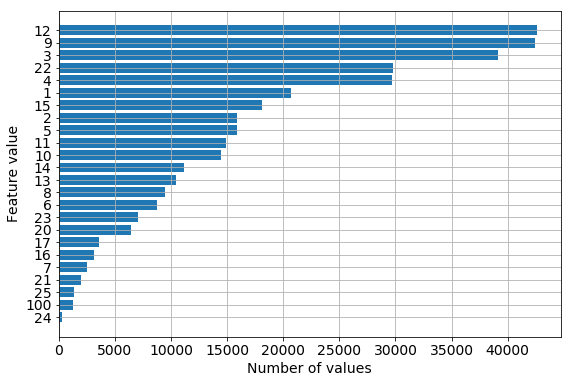

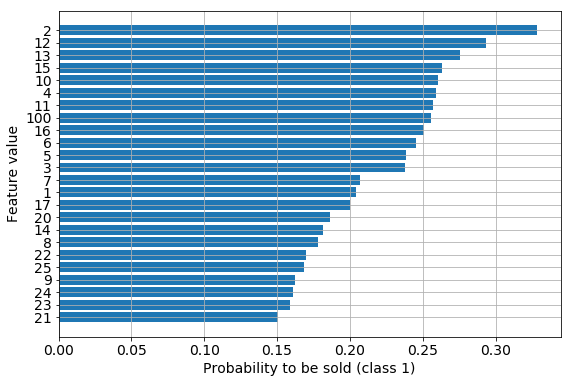

In [237]:
unique_values_bars(df, feature_name='category_id')

Graphs above show that the most fast sold objects have 'category_id' equal to 12, 9 and 3, however all these features have probability to be sold fast less than 0.3

Number of unique values:  2


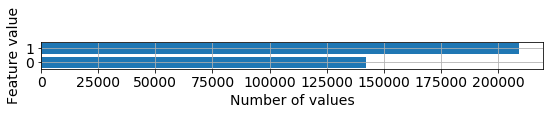

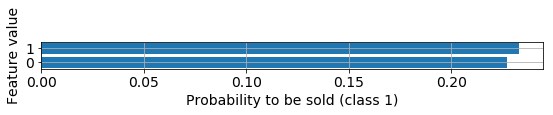

In [226]:
unique_values_bars(df, feature_name='payment_available')

Graphs above show that 'sold_fast' feature does not depend on value of'payment_available' feature

Number of unique values:  2


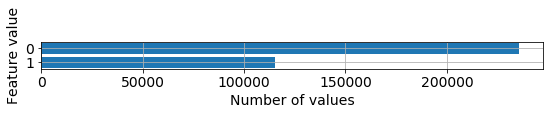

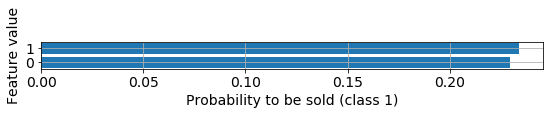

In [12]:
unique_values_bars(df, feature_name='delivery_available')

Graphs above show that 'sold_fast' feature does not depend on value of'delivery available' feature

Number of unique values:  281


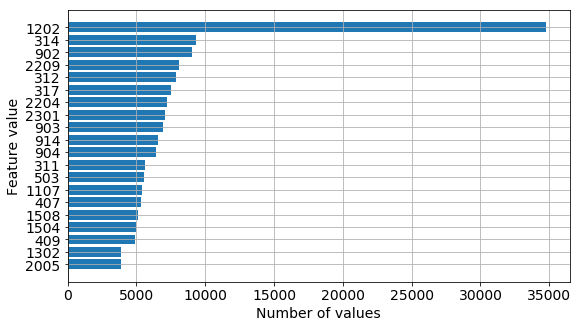

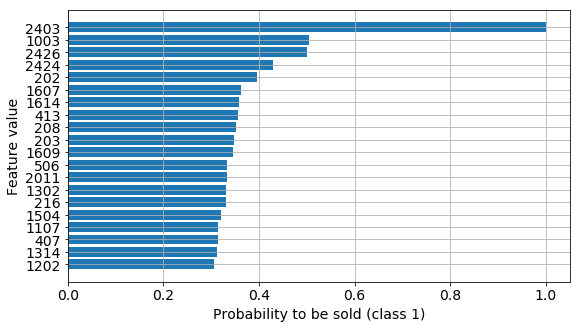

In [13]:
unique_values_bars(df, feature_name='subcategory_id', n_top=20)

Graphs above show that objects are sold especially rapidly when it's 'subcategory_id' is equal to 2403, however that is not a popular feature as less than 4800 of all objects have it

Number of unique values:  109


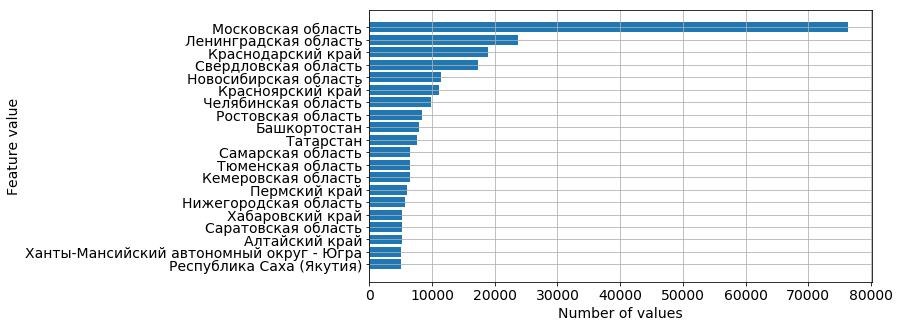

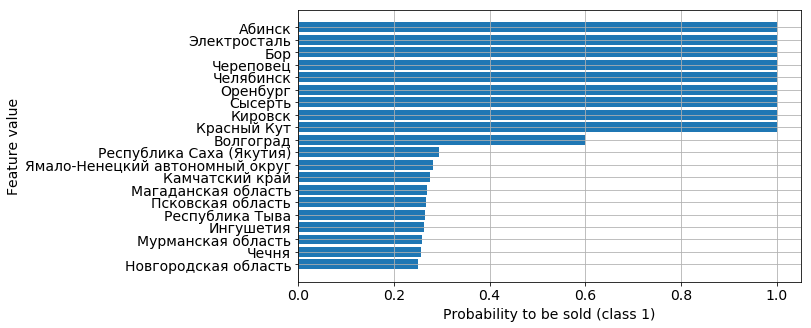

In [14]:
unique_values_bars(df, feature_name='region', n_top=20)

Graphs above show that things are sold most rapidly at 'Абинск', 'Электросталь', 'Бор', 'Череповец', 'Челябинск' regions, however number of sold objects in these regions is notably small: less than 10 000 

Number of unique values:  3


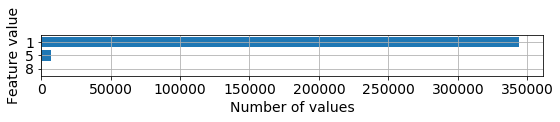

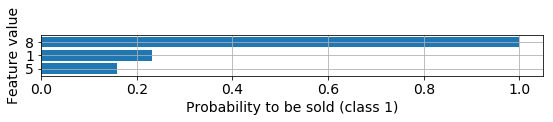

In [15]:
unique_values_bars(df, feature_name='product_type')

The data we can get from these graphs is rather obvious and irrelevant 

Number of unique values:  2861


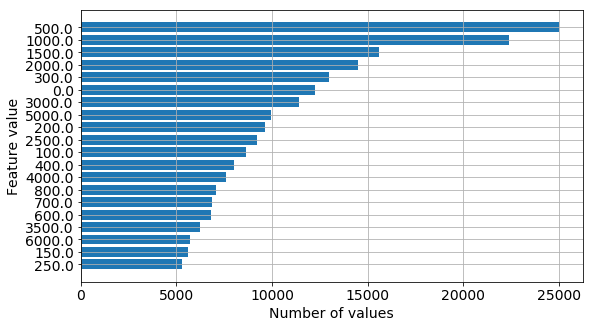

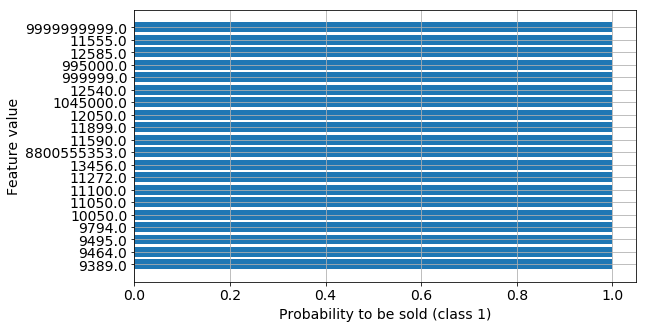

In [16]:
unique_values_bars(df, feature_name='price', n_top=20)

Current graphs show that most of the fastest sold objects are in price range 500..1500

In [2]:
unique_values_bars(df, feature_name='city', n_top=20)

In [231]:
data = pd.read_csv('train.tsv', sep = '\t')

In [232]:
def date2ymd(date):
    date_plitted = date.split('-')
    year = int(date_plitted[0])
    month = int(date_plitted[1])
    day = int(date_plitted[2])
    return [year, month, day]

In [233]:
feature_raw = data['date_created'].values
feature_values = np.array([date2ymd(i) for i in feature_raw])
labels = data['sold_fast'].values

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


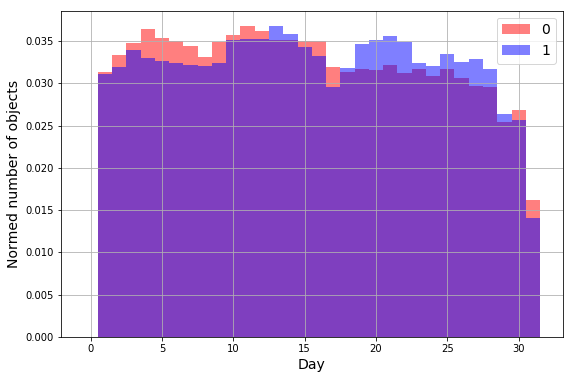

In [234]:
plt.figure(figsize=(9, 6))
bins = np.linspace(0, 32, 33)-0.5
plt.hist(feature_values[labels == 0, 2], bins=bins, label='0', color='r', alpha=0.5, normed=True)
plt.hist(feature_values[labels == 1, 2], bins=bins, label='1', color='b', alpha=0.5, normed=True)
plt.ylabel('Normed number of objects', size=14)
plt.xlabel('Day', size=14)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

This graph shows that objects are usually sold faster at the end of month, which probably correlates with people recieving their payments.

## Split into features and targets, train/test split

In [18]:
df.shape

(351281, 17)

In [19]:
df.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'payment_available',
       'price', 'product_type', 'properties', 'region', 'sold_mode',
       'subcategory_id', 'sold_fast'],
      dtype='object')

In [20]:
X = df[['category_id', 'city', 'product_type','region', 'subcategory_id', 'delivery_available', 'img_num', 'lat', 'long',
       'payment_available', 'price']]
y = df['sold_fast']

In [26]:
from sklearn.unique_values_bars(data, feature_name='city', n_top=20)model_selection import train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=777)

#  Categorial Features Preprocessing
#### from seminar

In [29]:
from collections import defaultdict, Counter
def target_encoding(features, targets):
    values = defaultdict(int)
    counts = Counter()
    for val, target in zip(features, targets):
        values[val] += target
        counts[val] += 1
    
    mean_values = dict()
    for val in values:
        if counts[val]!=0:
            mean_values[val] = values[val] / counts[val]
        else:
            mean_values[val] = 0.0
    
    return mean_values

In [30]:
def preprocess_cat_features(X,y, cat_features):
    cat_features_dict = dict()
    for feature in cat_features:
        cat_features_dict[feature] = target_encoding(X[feature].values, y)
    return cat_features_dict

In [31]:
cat_features =  ['category_id', 'city', 'product_type','region', 'subcategory_id']

In [32]:
cat_features_dict = preprocess_cat_features(X_train, y_train, cat_features)

In [33]:
X_train_cat=X_train[['delivery_available', 'img_num', 'lat', 'long',
       'payment_available', 'price']]

In [34]:
for feature in cat_features:
    res = [0] * len(X_train)
    for i, val in enumerate(X_train[feature].values):
        res[i] = cat_features_dict[feature][val]
    X_train_cat = np.c_[X_train_cat, np.array(res)]

In [35]:
X_test_cat=X_test[['delivery_available', 'img_num', 'lat', 'long',
       'payment_available', 'price']]

In [36]:
for feature in cat_features:
    res = [0] * len(X_test)
    for i, val in enumerate(X_test[feature].values):
        if val in cat_features_dict[feature]:
            res[i] = cat_features_dict[feature][val]
        else:
            res[i] = 0
    X_test_cat = np.c_[X_test_cat, np.array(res)]

# Baseline Prediction

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
X_train_p=sc.fit_transform(X_train_cat)
X_test_p=sc.transform(X_test_cat)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()
model.fit(X_train_p,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
from sklearn.metrics import roc_auc_score
probs=model.predict_proba(X_test_p)

In [42]:
roc_auc_score(y_test,probs[:,1])

0.5929193076061621

# Best Model
### More feature preprocessing

In [43]:
df.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'payment_available',
       'price', 'product_type', 'properties', 'region', 'sold_mode',
       'subcategory_id', 'sold_fast'],
      dtype='object')

#### Train/test split

In [44]:
Xc = df[['category_id', 'city', 'product_type','region', 'subcategory_id', 'delivery_available', 'img_num', 'lat', 'long',
       'payment_available', 'price', 'date_created','sold_mode','name_text','desc_text']]
yc = df['sold_fast']

In [45]:
Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size=0.10, random_state=777)

#### Tagret encoding and NLP feature generation

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

name_text = Xc_train['name_text'].values
vectorizer_name_text = TfidfVectorizer(max_features=300, decode_error='ignore')
vectorizer_name_text.fit(name_text)

desc_text = Xc_train['desc_text'].values
vectorizer_desc_text = TfidfVectorizer(max_features=300, decode_error='ignore')
vectorizer_desc_text.fit(desc_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=300, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [47]:
def cat2proba_dict(values, labels):
    cat_dict = {}
    probas = []
    for aval in np.unique(values):
        labels_for_val = labels[values == aval]
        n = len(labels_for_val)
        n_1 = len(labels_for_val[labels_for_val == 1])
        p = 1.0 * n_1 / n
        cat_dict[aval] = p
    return cat_dict

def cat2proba(cat_dict, values):
    probas = []
    for aval in values:
        if aval in cat_dict:
            probas.append(cat_dict[aval])
        else:
            probas.append(0)
    return np.array(probas)

In [48]:
# Category to probabilities
category_id_dict = cat2proba_dict(Xc_train['category_id'].values, yc_train)
subcategory_id_dict = cat2proba_dict(Xc_train['subcategory_id'].values, yc_train)

city_dict = cat2proba_dict(Xc_train['city'].values, yc_train)
region_dict = cat2proba_dict(Xc_train['region'].values, yc_train)

In [49]:
from sklearn.preprocessing import OneHotEncoder

ohe_category_id = OneHotEncoder(handle_unknown='ignore')
ohe_category_id.fit(Xc_train['category_id'].values.reshape(-1, 1))


ohe_subcategory_id = OneHotEncoder(handle_unknown='ignore')
ohe_subcategory_id.fit(Xc_train['subcategory_id'].values.reshape(-1, 1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True)

In [50]:
def preprocessing(data):
    
    x1 = data[['category_id', 'lat', 'long', 'price', 'product_type', 'sold_mode', 'subcategory_id', 'img_num']].values
    x3 = data[['payment_available', 'delivery_available']].values * 1.
    
    x10 = cat2proba(category_id_dict, data['category_id'].values).reshape(-1, 1)
    x11 = cat2proba(subcategory_id_dict, data['subcategory_id'].values).reshape(-1, 1)
    x12 = cat2proba(city_dict, data['city'].values).reshape(-1, 1)
    x13 = cat2proba(region_dict, data['region'].values).reshape(-1, 1)
    
    x100 = ohe_category_id.transform(data['category_id'].values.reshape(-1, 1)).toarray()
    x101 = ohe_subcategory_id.transform(data['subcategory_id'].values.reshape(-1, 1)).toarray()
    
    month_of_year=data['date_created'].apply(lambda x: x.month).values.reshape(-1, 1)
    day_of_month=data['date_created'].apply(lambda x: x.day).values.reshape(-1, 1)
    day_of_year=data['date_created'].apply(lambda x: x.dayofyear).values.reshape(-1, 1)
    day_of_week=data['date_created'].apply(lambda x: x.dayofweek).values.reshape(-1, 1)
    total=data['date_created'].apply(lambda x:x - np.datetime64('2005-02-25')).values.reshape(-1, 1).astype('uint64')
    
    name_text = data['name_text'].values
    x1000 = vectorizer_name_text.transform(name_text).toarray()
    desc_text = data['desc_text'].values
    x1001 = vectorizer_desc_text.transform(desc_text).toarray()
    X = np.concatenate(tuple([x1, x3, x10, x11, x12, x13, x100, x101,x1000,x1001,month_of_year, day_of_month, day_of_year,
       day_of_week, total]), axis=1)
    
    return X

In [51]:
X_train = preprocessing(Xc_train)
X_test = preprocessing(Xc_test)

### Automatic feature selection

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
fs=SelectKBest(chi2,200)

In [54]:
fs.fit(X_train, yc_train)

SelectKBest(k=200, score_func=<function chi2 at 0x11d478e18>)

In [55]:
Xt_new=fs.transform(X_train)
Xtt_new=fs.transform(X_test)

In [56]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [57]:
rf = RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_leaf=10, min_samples_split=20,n_jobs=3,random_state=42)

In [58]:
rf.fit(Xt_new, yc_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Check ROC-AUC and check for overfitting

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
yp=rf.predict_proba(Xtt_new)

In [61]:
roc_auc_score(yc_test,yp[:,1])

0.6347596213752651

In [62]:
yp_train=rf.predict_proba(Xt_new)
roc_auc_score(yc_train,yp_train[:,1])

0.7166163645977917

Overfits a bit, but still got the best score <br>
Looks good, lets make a submission

In [63]:
X_full=fs.transform(preprocessing(Xc))
rf_full = RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_leaf=10, min_samples_split=20,n_jobs=3,random_state=42)

In [64]:
rf_full.fit(X_full, yc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
data_submit = pd.read_csv('test_nolabel.tsv', sep = '\t')

In [66]:
data_submit['date_created']=pd.to_datetime(data_submit['date_created'],format='%Y-%m-%d')

In [67]:
X_submit = fs.transform(preprocessing(data_submit))

In [68]:
y_submit_pred = rf_full.predict_proba(X_submit)[:, 1]

In [69]:
product_id = data_submit['product_id'].values
data_submit = pd.DataFrame.from_dict({'product_id' : product_id, 'score' : y_submit_pred})
data_submit.to_csv('to_submit', sep = ',', index = False)

In [70]:
y_train_pred = rf_full.predict_proba(X_full)[:, 1]

### Model Interpretation with surroggate model

In [71]:
from sklearn.tree  import DecisionTreeRegressor
dtc=DecisionTreeRegressor(max_depth=6, min_samples_leaf=100)
dtc.fit(X_full,y_train_pred)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [238]:
feature_names = ['category_id','lat', 'long', 'price', 'product_type', 'sold_mode', 'subcategory_id', 'img_num', 'payment_available', 'delivery_available','category_id_te','subcategory_id_te','city','region']

In [ ]:
time_f=['month_of_year',' day_of_month','day_of_year','day_of_week','total_time']

In [ ]:
name_t= vectorizer_name_text.get_feature_names()
desc_t= vectorizer_desc_text.get_feature_names()

In [ ]:
ohecat = ohe_category_id.categories_[0].tolist()

In [ ]:
for i in range(len(ohecat)):
    ohecat[i]="category_id_"+str(ohecat[i])

In [ ]:
ohesubcat = ohe_subcategory_id.categories_[0].tolist()

In [ ]:
for i in range(len(ohesubcat)):
    ohesubcat[i]="subcategory_id_"+str(ohesubcat[i])

In [ ]:
feature_names_all=feature_names+ohecat+ohesubcat+time_f+name_t+desc_t

In [ ]:
support = fs.get_support()

In [ ]:
selected_features=[]
for i in range(len(feature_names_all)):
    if support[i]:
        selected_features.append(feature_names_all[i])

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='tree.dot',feature_names=selected_features)

### Got this tree
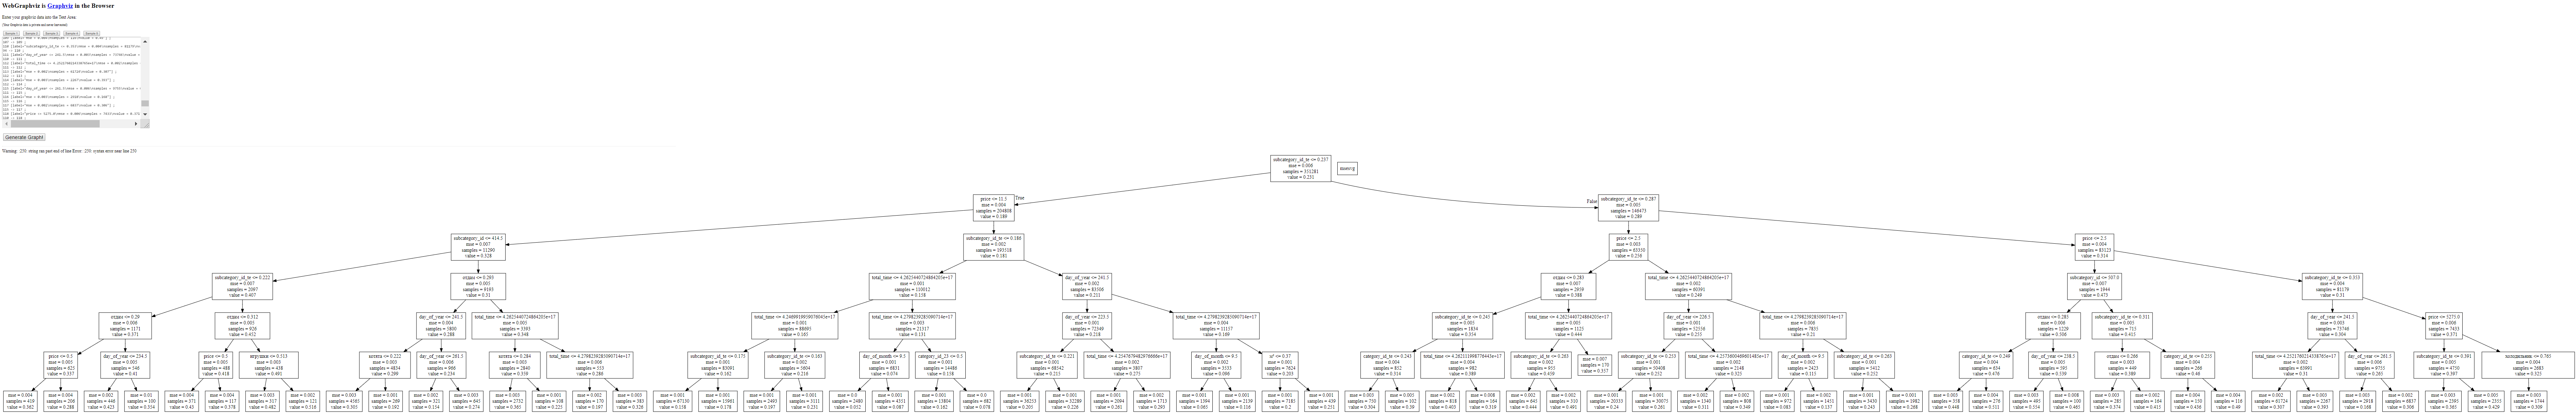

## Interesting findings

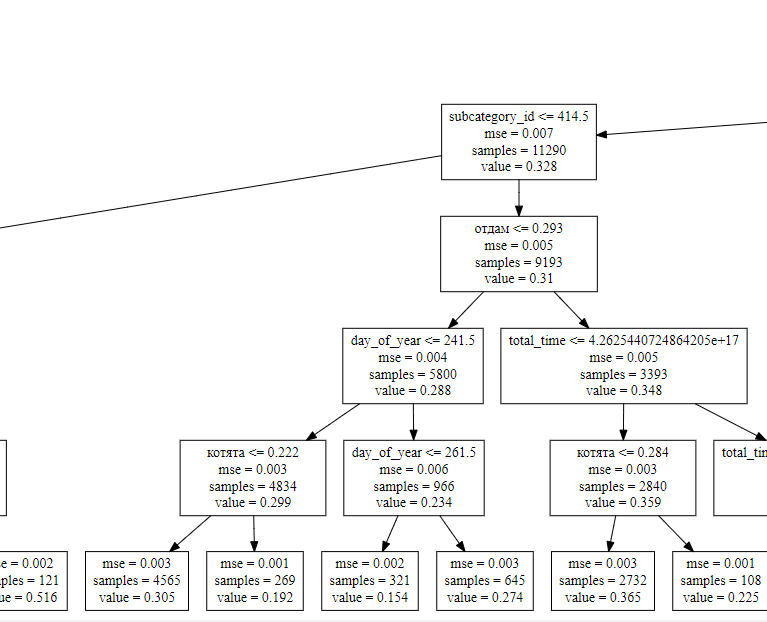

According to our model:
People tend not to shelter cats before 242th day of the year (approximately august-september)))<br>
People like to take things for free starting from autmn

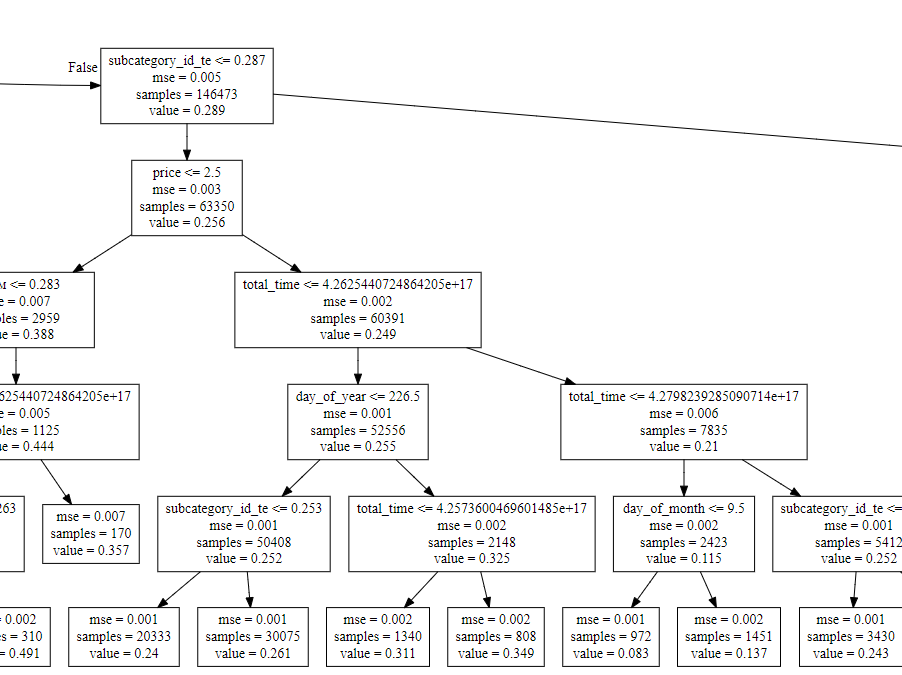

According to our model (at lest some time ago) people tend to buy things faster in the end of the month - in first 9 days of month probability to be sold fast is very low. This reflects our findings in Descriptive Data Analysis Section

# Failed Approaches
### KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=20,weights='distance',n_jobs=3)
kn.fit(X_train,yc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=20, p=2,
           weights='distance')

In [76]:
y_pred=kn.predict_proba(X_test)

In [77]:
roc_auc_score(yc_test,y_pred[:, 1])

0.5511999253190348

Unfortunately, very low score
### AdaBoost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
ab=AdaBoostClassifier(n_estimators=500)

In [80]:
ab.fit(Xt_new, yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None)

In [81]:
ypa=ab.predict_proba(Xtt_new)

In [82]:
roc_auc_score(yc_test,ypa[:,1])

0.6324294254860432

In [83]:
yp_train=ab.predict_proba(Xt_new)
roc_auc_score(yc_train,yp_train[:,1])

0.643023744554647

No overfitting, but still low score
### XGBoost

In [84]:
!pip install xgboost

In [85]:
import xgboost as xgb

In [86]:
dtrain = xgb.DMatrix(X_train, label=yc_train)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [87]:
dtest = xgb.DMatrix(X_test, label=yc_test)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [88]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [89]:
param = {'max_depth': 10, 'eta': 0.5,'growpolicy':'depthwise', 'objective': 'binary:logistic','subsample':0.5}
param['nthread'] = 3
param['eval_metric'] = 'auc'

In [90]:
num_round = 25
xgboo = xgb.train(param, dtrain,num_round,evallist)

[0]	eval-auc:0.609983	train-auc:0.637167
[1]	eval-auc:0.611975	train-auc:0.646405
[2]	eval-auc:0.615186	train-auc:0.653467
[3]	eval-auc:0.616267	train-auc:0.659566
[4]	eval-auc:0.616085	train-auc:0.664605
[5]	eval-auc:0.617041	train-auc:0.670594
[6]	eval-auc:0.617258	train-auc:0.67271
[7]	eval-auc:0.617866	train-auc:0.676236
[8]	eval-auc:0.618173	train-auc:0.678257
[9]	eval-auc:0.618973	train-auc:0.680489
[10]	eval-auc:0.61856	train-auc:0.682418
[11]	eval-auc:0.618367	train-auc:0.684146
[12]	eval-auc:0.618042	train-auc:0.686765
[13]	eval-auc:0.618278	train-auc:0.688289
[14]	eval-auc:0.618165	train-auc:0.689487
[15]	eval-auc:0.618077	train-auc:0.691519
[16]	eval-auc:0.617596	train-auc:0.692977
[17]	eval-auc:0.616764	train-auc:0.694801
[18]	eval-auc:0.616326	train-auc:0.695866
[19]	eval-auc:0.615618	train-auc:0.697509
[20]	eval-auc:0.614819	train-auc:0.699645
[21]	eval-auc:0.614615	train-auc:0.700915
[22]	eval-auc:0.614411	train-auc:0.702671
[23]	eval-auc:0.614658	train-auc:0.703974
[24]

Overfits + low score on test

### XGBoost on logistic regressions

In [91]:
paraml = {'booster':'gblinear','feature_selector':'shuffle', 'objective': 'binary:logistic'}
paraml['nthread'] = 4
paraml['eval_metric'] = 'auc'

In [92]:
xgboostlinear = xgb.train(paraml, dtrain,num_round,evallist)

[0]	eval-auc:0.594667	train-auc:0.600619
[1]	eval-auc:0.611045	train-auc:0.617844
[2]	eval-auc:0.61421	train-auc:0.6225
[3]	eval-auc:0.615339	train-auc:0.624464
[4]	eval-auc:0.615787	train-auc:0.625432
[5]	eval-auc:0.616156	train-auc:0.626186
[6]	eval-auc:0.616402	train-auc:0.626787
[7]	eval-auc:0.616614	train-auc:0.627302
[8]	eval-auc:0.616737	train-auc:0.627746
[9]	eval-auc:0.616771	train-auc:0.628107
[10]	eval-auc:0.616895	train-auc:0.628443
[11]	eval-auc:0.617047	train-auc:0.628776
[12]	eval-auc:0.61715	train-auc:0.629059
[13]	eval-auc:0.617121	train-auc:0.629355
[14]	eval-auc:0.617166	train-auc:0.629617
[15]	eval-auc:0.617144	train-auc:0.62986
[16]	eval-auc:0.617196	train-auc:0.630083
[17]	eval-auc:0.617151	train-auc:0.630284
[18]	eval-auc:0.617233	train-auc:0.630475
[19]	eval-auc:0.617304	train-auc:0.630655
[20]	eval-auc:0.617285	train-auc:0.630813
[21]	eval-auc:0.617362	train-auc:0.630997
[22]	eval-auc:0.617375	train-auc:0.631166
[23]	eval-auc:0.617323	train-auc:0.631319
[24]	ev

Low score on test

## Failed approaches to feature preprocessing
#### NLP feature engeneering
Simple approach

In [93]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
descs = df[['desc_text']]
descs_copy = np.array(descs)
for i in tqdm_notebook(range(len(descs_copy))):
    descs_copy[i] = ' '.join([morph.parse(word)[0].normal_form for word in str(descs_copy[i]).split(" ")])

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
descs_tifd = descs_copy.tolist()
descs_tfid_list=[]
for i in descs_tifd:
    descs_tfid_list.append(i[0])
vectorizer = TfidfVectorizer(min_df = 0.02)
descs_tifd_i = vectorizer.fit_transform(descs_tfid_list)
vectorizer.get_feature_names()

['10',
 '100',
 'без',
 'большой',
 'быть',
 'весь',
 'возможный',
 'время',
 'всё',
 'высота',
 'год',
 'два',
 'детский',
 'диск',
 'длина',
 'для',
 'до',
 'доставка',
 'есть',
 'ещё',
 'за',
 'зарядка',
 'идеальный',
 'из',
 'или',
 'как',
 'комплект',
 'коробка',
 'купить',
 'любой',
 'можно',
 'мочь',
 'на',
 'не',
 'нет',
 'но',
 'новая',
 'новое',
 'новые',
 'новый',
 'ный',
 'обмен',
 'один',
 'он',
 'от',
 'отдать',
 'отлично',
 'отличное',
 'отличный',
 'очень',
 'память',
 'писать',
 'по',
 'под',
 'подарок',
 'подойти',
 'покупать',
 'полностью',
 'полный',
 'пользоваться',
 'при',
 'продавать',
 'продаваться',
 'продать',
 'работает',
 'работать',
 'рабочий',
 'раз',
 'размер',
 'ребёнок',
 'самовывоз',
 'связь',
 'см',
 'состояние',
 'состоянии',
 'срочно',
 'так',
 'телефон',
 'только',
 'торг',
 'ть',
 'удобный',
 'фото',
 'хорошее',
 'хороший',
 'цвета',
 'цена',
 'чехол',
 'что',
 'экран']

In [95]:
good_cond_f = []
for sent in descs_tfid_list:
    if 'хорошем' in sent:
        good_cond_f.append(1)
    else:
        good_cond_f.append(0)
best_cond_f = []
for sent in descs_tfid_list:
    if 'отличном' in sent:
        best_cond_f.append(1)
    else:
        best_cond_f.append(0)
works_f = []
for sent in descs_tfid_list:
    if 'работает' in sent:
        works_f.append(1)
    else:
        works_f.append(0)
bargain_f = []
for sent in descs_tfid_list:
    if 'торг' in sent:
        bargain_f.append(1)
    else:
        bargain_f.append(0)
df['good_cond'] = pd.Series(good_cond_f, index=df.index)
df['best_cond'] = pd.Series(best_cond_f, index=df.index)
df['work_cond'] = pd.Series(works_f, index=df.index)
df['bargain'] = pd.Series(bargain_f, index=df.index)

More complex approach

In [96]:
import pymorphy2
from stop_words import get_stop_words

stop_words = get_stop_words('ru')
stop_words = get_stop_words('russian')
morph = pymorphy2.MorphAnalyzer()



def get_normal_form(word):
    p = morph.parse(word)[0]
    return p.normal_form
     
def preproc_desc(desc):
    char_list = [',', '.', '!']
    for ch in char_list:
        desc = desc.replace(ch, " ")
        
    desc = desc.strip()
    
    return desc.lower()

def remove_stop_words_from_desc(desc):
    desc = preproc_desc(desc)
    words = desc.split(" ")
    new_desc = ""
    
    for i in range(len(words)):
        if not words[i] in stop_words:
            new_desc += words[i] + " "
    
    return new_desc

def remove_stop_words_from_df(data_frame, col_name):
    for index, row in data_frame.iterrows():
        df.at[index, col_name] = remove_stop_words_from_desc(df[col_name][index])

### Feature engeneering - Relation of price to mean price of same items
Based on assumption that if price is lower than average price of same items it will sell faster

In [171]:
import re

def find_prefixes(data):
    prefixes = set()


    pattern = re.compile("[_a-zA-Z]*(tip|type|brand|poroda|marka|odezhda|obuv|vid|smartfony|holodilnik|igri|shiny)[_a-zA-Z]*")
    prop_arr = data["properties"].values

    for elem in tqdm_notebook(range(len(prop_arr))):
        if prop_arr[elem] != None:
            match = re.search(pattern, prop_arr[elem])
            if match != None:
                prefixes.add(match.group(0))
    return prefixes

def add_tip(data, prefixes):
    data["tip"] = data["properties"].apply(lambda x: find_tip(x,prefixes))
    
    data["tip"] = data["tip"].apply(lambda x: change_tip(x))
    data["tip"] = data["tip"].apply(lambda x: cut_tips(x))
    
    return data
    
def create_mpd(data, prefixes_cut):
    prefixes_cut = np.unique(data["tip"].values)
    mean_price_dict = {}

    for tip in prefixes_cut:
        new_tip_df = data[data["tip"] == tip]
        mean = new_tip_df["price"].mean()
        mean_price_dict[tip] = mean
    return mean_price_dict
    
            
extra_types = ["smartfony", "holodilnik", "igri", "shiny", "odezhda"]
type_words = ["tip", "type", "brand", "poroda", "marka", "vid"]


def calc_relationships(data, mpd):
    prices = data["price"].values
    tips = data["tip"].values
    relations = []

    for i in range(len(prices)):
        if tips[i] in mpd:
            if mpd[tips[i]] != 0:
                relations.append(prices[i] / mpd[tips[i]])
            else:
                relations.append(0)
        else:
            relations.append(0)
    return relations

In [172]:
def find_tip(elem,prefixes):
    for tip in prefixes:
        if tip in elem:
            return tip
    return "no_tip"

def change_tip(data_f):
    for e in extra_types:
        if e in data_f:
            return e
    return data_f

def cut_tips(data_f):
    for w in type_words:
        if w in data_f:
            return data_f.replace(w, "")
    return data_f

def fit_tips(data):
    prefixes = find_prefixes(data)
    data = add_tip(data, prefixes)
    return create_mpd(data, prefixes)

def transform_tips(data, mpd):
    prefixes = find_prefixes(data)
    data = add_tip(data, prefixes)
    relations = pd.Series(calc_relationships(data, mpd),index=data.index)
    data["rel_to_mean"] = relations
    return data

In [99]:
def preprocessing_with_nlp(data):
    
    x1 = data[['category_id', 'lat', 'long', 'price', 'product_type', 'sold_mode', 'subcategory_id', 'img_num', "rel_to_mean"]].values
    x3 = data[['payment_available', 'delivery_available']].values * 1.
    
    x10 = cat2proba(category_id_dict, data['category_id'].values).reshape(-1, 1)
    x11 = cat2proba(subcategory_id_dict, data['subcategory_id'].values).reshape(-1, 1)
    x12 = cat2proba(city_dict, data['city'].values).reshape(-1, 1)
    x13 = cat2proba(region_dict, data['region'].values).reshape(-1, 1)
    x14 = cat2proba(tip_dict, data['tip'].values).reshape(-1, 1)
    
    x100 = ohe_category_id.transform(data['category_id'].values.reshape(-1, 1)).toarray()
    x101 = ohe_subcategory_id.transform(data['subcategory_id'].values.reshape(-1, 1)).toarray()
    
    month_of_year=data['date_created'].apply(lambda x: x.month).values.reshape(-1, 1)
    day_of_month=data['date_created'].apply(lambda x: x.day).values.reshape(-1, 1)
    day_of_year=data['date_created'].apply(lambda x: x.dayofyear).values.reshape(-1, 1)
    day_of_week=data['date_created'].apply(lambda x: x.dayofweek).values.reshape(-1, 1)
    total=data['date_created'].apply(lambda x:x - np.datetime64('2005-02-25')).values.reshape(-1, 1).astype('uint64')
    
    name_text = data['name_text'].values
    x1000 = vectorizer_name_text.transform(name_text).toarray()
    
    desc_text_good = []
    
    desc_text = data['desc_text'].values
    
    good_words = ["хорошее", "хорошем", "отличное", "отличном",'новая','новые','новый', "идеальном", "идеальное"]
    
    for e in desc_text:
        flag = False
        for word in good_words:
            if word in e:
                flag = True
        if flag:
            desc_text_good.append(1)
        else:
            desc_text_good.append(0)
        
            
    
    x1001 = vectorizer_desc_text.transform(desc_text).toarray()
    X = np.concatenate(tuple([x1, x3, x10, x11, x12, x13,x14, x100, x101, x1001, x1000, month_of_year, day_of_month, day_of_year,
       day_of_week, total, desc_text_good, ]), axis=1)
    
    return X

In [100]:
remove_stop_words_from_df(df, "desc_text")
remove_stop_words_from_df(df, "name_text")

In [101]:
descs = df[['desc_text']]
names = df[['name_text']]

In [102]:
descs_copy = np.array(descs)
for i in tqdm_notebook(range(len(descs_copy))):
    descs_copy[i] = ' '.join([morph.parse(word)[0].normal_form for word in str(descs_copy[i]).split(" ")])

In [103]:
names_copy = np.array(names)
for i in tqdm_notebook(range(len(names_copy))):
    names_copy[i] = ' '.join([morph.parse(word)[0].normal_form for word in str(names_copy[i]).split(" ")])

In [104]:
df["desc_text"] = descs_copy
df["name_text"] = names_copy

In [105]:
Xc = df[['category_id', 'city', 'product_type','region', 'subcategory_id', 'delivery_available', 'img_num', 'lat', 'long',
       'payment_available', 'price','sold_mode','name_text','desc_text', 'properties']]
yc = df['sold_fast']
Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size=0.10, random_state=777)

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

name_text = Xc_train['name_text'].values
vectorizer_name_text = TfidfVectorizer(max_features=300, decode_error='ignore')
vectorizer_name_text.fit(name_text)

desc_text = Xc_train['desc_text'].values
vectorizer_desc_text = TfidfVectorizer(max_features=300, decode_error='ignore')
vectorizer_desc_text.fit(desc_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=300, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [173]:
mpd = fit_tips(Xc_train)
Xc_train = transform_tips(Xc_train, mpd)
Xc_test = transform_tips(Xc_test, mpd)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Very cool features but model overfits

## Prediction without machine learning
We tried(((

In [ ]:
df2 = pd.read_csv('train.tsv', delimiter='\t')
df2['date_created']=pd.to_datetime(df2['date_created'],format='%Y-%m-%d')
df2 = df2.drop('Unnamed: 0',axis=1)
df2[['delivery_available', 'payment_available']]=df2[['delivery_available', 'payment_available']].astype(int)
df2=df2.drop('owner_id',axis=1)

def prob_prediction_for_dataset(data):
    not_used_features = ["date_created", "sold_fast", "product_id"]

    f_list = []
    for index, row in tqdm_notebook(data.iterrows()):
        mean_prob = 0
        for feature in list(data.columns):
            if feature in not_used_features:
                pass
            else:
                mean_prob += prob_prediction_for_feature(df, feature, row[feature])

            mean_prob /= 19

        if mean_prob >= 0:
            f_list.append(mean_prob)
    return f_list

In [ ]:
print(list(df.columns))

product_ids = df2["product_id"].values
scores = prob_prediction_for_dataset(df)

data_submit = dict(zip(product_ids, scores))

product_id = data_submit['product_id'].values
data_submit = pd.DataFrame.from_dict({'product_id' : product_id, 'score' : y_submit_pred})
data_submit.to_csv('to_submit.csv', sep = ',', index = False)